In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch
from neural_net import *
from train_net import *
from utils import *
from validate import *
from terminal_data import *

# train on 1K points 
torchnet = train(nhiddenUnits = 256,datasize = 1000, epochs= 10000, batchsize = 1000, lr = 1e-3)
torch.save(torchnet, "net1.pth")

100%|██████████| 10000/10000 [03:35<00:00, 46.33it/s]

Training lasted = 216 seconds


In [3]:
# train on 100K points
#torchnet2 = train(nhiddenUnits = 256,datasize = 100000, epochs= 10000, batchsize = 10000, lr = 1e-3)
#torch.save(torchnet, "net2.pth")

  0%|          | 37/10000 [00:57<4:18:06,  1.55s/it]


KeyboardInterrupt: 

In [3]:
# load the smaller trained deep network
net1 = torch.load("net1.pth")
#net2 = torch.load("net2.pth")

Mean Squared Error during testing is 0.008028408512473106
......................................................................

 Plot of ddp.cost from plain crocoddyl and value function predicted by Neural Network


<Figure size 432x288 with 0 Axes>

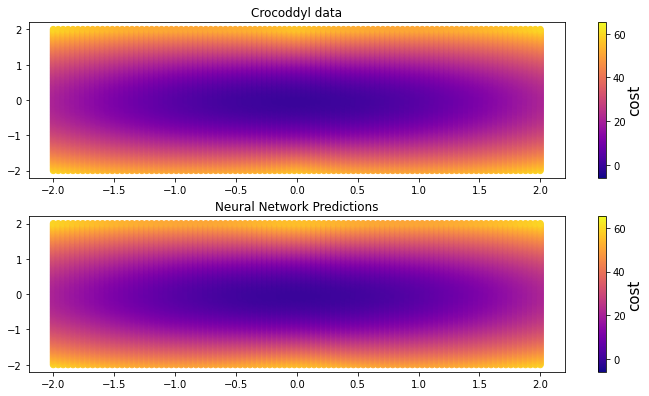

Plotting scatter of error between ddp.cost and cost predicted by Neural Net


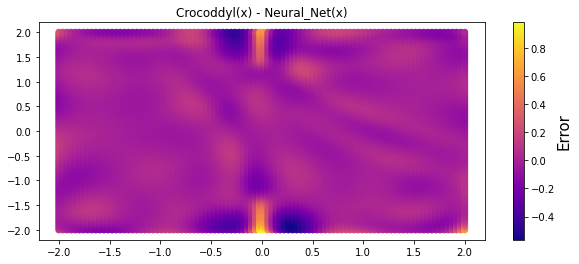

In [4]:
validate_and_plot(net1, plot_data=True, plot_error=True, savename="net1_validation")
#validate_and_plot(net2, plot_data = True, plot_error= True, savename = "net2_validation")

### Crocoddyl cost and iterations.



In [ ]:
# Returns the cost, trajectory andcircular_crocoddylcoddylcoddylcoddylcoddylof pure crocoddyl 
costs_c, trajectories_c, iterations_c = circular_crocoddyl()

In [ ]:
plot_trajectories(costs_c,trajectories_c,"Cost")

In [ ]:
plot_trajectories(iterations_c,trajectories_c,"Iterations")

### Lets put the neural net inside crocoddyl and plot the results. 

In [ ]:
# Returns the cost, trajectory and iterations when crocoddyl has terminal model with neural net inside it.
# Note that outliers have not been removed. 
costs, trajectories, iterations = circular_terminal_net(net1, remove_outliers = False)

In [ ]:
# Plotting trajectories colored according to cost
plot_trajectories(costs,trajectories,"Cost", "net1_cost_traj")

In [ ]:
# Plotting trajectories colored according to iterations
plot_trajectories(iterations,trajectories,"Iterations", "net1_iter_traj")

### Let's remove the outliers and plot the results

### Scatter plot of error between crocoddyl and crocoddyl with terminal network.

In [ ]:
# Will take a long time to run
cost_net, iterations_net, cost, iterations = terminal_data(net = torchnet, size = 50)
plot_utils(cost, cost_net , 50, 'cost', True )
